# Project Name: Recommendation System For Retail Stores

### -Vaishnu Rewatkar

In this Recommedation system we analyze an online retail data set and provide recommendation to User B depending on User A buying pattern, listing the top 10 similar product based on consine similarity Matrix from SkLearn.

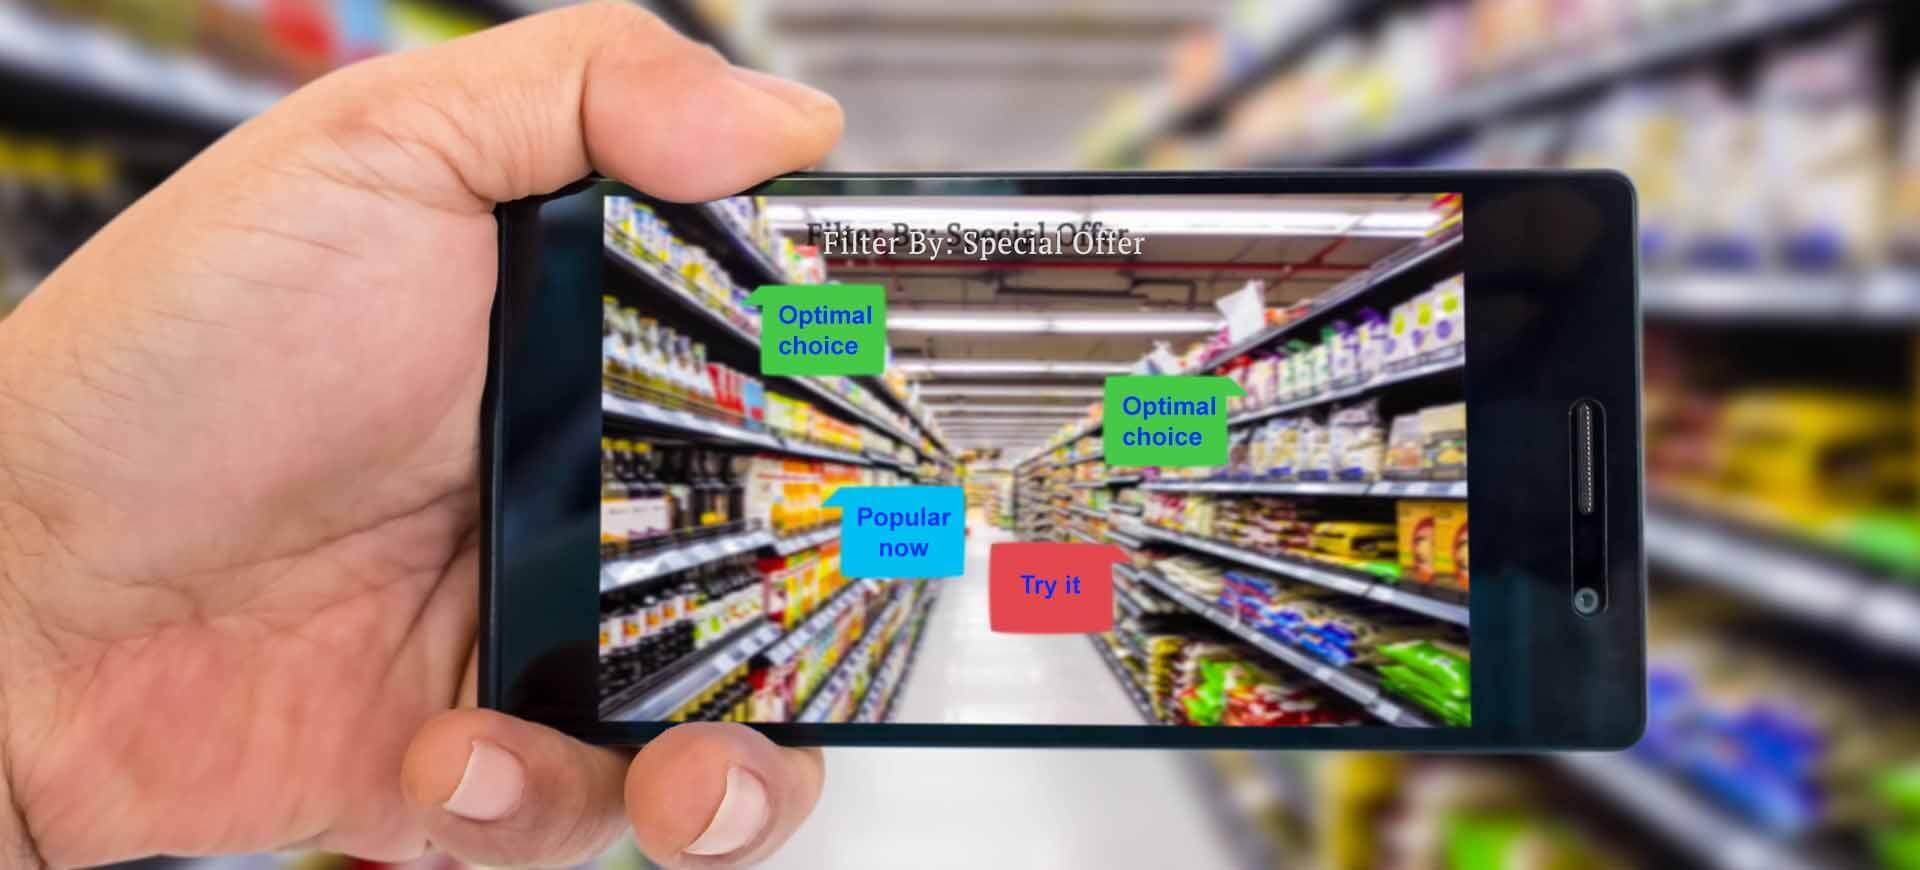

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image
Image(filename="C:\\Users\\sanjay rewatkar\\Downloads\\recommender_system_.jpg", width=900, height=100)

# Loading libraries

In [2]:
import pandas as pd
import os

# Loading Dataset

In [3]:
display (os.getcwd())

'C:\\Users\\sanjay rewatkar\\Desktop\\codeclause'

In [4]:
os.chdir('C:\\Users\\sanjay rewatkar\\Desktop\\codeclause\\')
display (os.getcwd())

'C:\\Users\\sanjay rewatkar\\Desktop\\codeclause'

In [5]:
df =pd.read_csv("Online Retail.csv", header=0)
display (df)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
541904,581587,09-12-2011,12:50:00 PM,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,12680.0,France
541905,581587,09-12-2011,12:50:00 PM,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,12680.0,France
541906,581587,09-12-2011,12:50:00 PM,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,12680.0,France
541907,581587,09-12-2011,12:50:00 PM,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,12680.0,France


# Prepare the data

In [31]:
df.shape

(397924, 10)

In [6]:
df = df.loc[df['Quantity'] > 0]

#### Identify null components

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   InvoiceDate  531285 non-null  object 
 2   InvoiceTime  531285 non-null  object 
 3   StockCode    531285 non-null  object 
 4   Description  530693 non-null  object 
 5   Quantity     531285 non-null  int64  
 6   UnitPrice    531285 non-null  float64
 7   Totalsale    531285 non-null  float64
 8   CustomerID   397924 non-null  float64
 9   Country      531285 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 44.6+ MB


In [8]:
df['CustomerID'].isna().sum()
df = df.dropna(subset=['CustomerID'])

#### Creating the customer-item matrix

In [9]:
customer_item_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
)
customer_item_matrix.loc[12481:].head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
12483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
12484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
12488.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
12489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [10]:
print(customer_item_matrix.shape)
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

(4339, 3665)


# Collaborative Filtering

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

#### User based collaborative filtering

In [12]:
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [13]:
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [14]:
#Renaming index and column names

user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [15]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False).head(10)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
16692.0    0.171499
12791.0    0.171499
16754.0    0.171499
12814.0    0.171499
16426.0    0.166968
16333.0    0.161690
Name: 12350.0, dtype: float64

## Making Recommendations

In [16]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False)
items_bought_by_A = customer_item_matrix.loc[12350.0][customer_item_matrix.loc[12350.0]>0]
print("Items Bought by A: ")
print(items_bought_by_A)

Items Bought by A: 
StockCode
20615     1
20652     1
21171     1
21832     1
21864     1
21866     1
21908     1
21915     1
22348     1
22412     1
22551     1
22557     1
22620     1
79066K    1
79191C    1
84086C    1
POST      1
Name: 12350.0, dtype: int64


In [17]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False)
items_bought_by_A = customer_item_matrix.loc[12350.0][customer_item_matrix.loc[12350.0]>0]
print("Items Bought by A: ")
print(items_bought_by_A)

Items Bought by A: 
StockCode
20615     1
20652     1
21171     1
21832     1
21864     1
21866     1
21908     1
21915     1
22348     1
22412     1
22551     1
22557     1
22620     1
79066K    1
79191C    1
84086C    1
POST      1
Name: 12350.0, dtype: int64


In [18]:
items_bought_by_B = customer_item_matrix.loc[17935.0][customer_item_matrix.loc[17935.0]>0]
print("Items bought by B:")
print(items_bought_by_B)

print()

items_to_recommend_to_B = set(items_bought_by_A.index) - set(items_bought_by_B.index)
print("Items to Recommend to B ")
print(items_to_recommend_to_B)
df.loc[df['StockCode'].isin(items_to_recommend_to_B),['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

Items bought by B:
StockCode
20657     1
20659     1
20828     1
20856     1
21051     1
21866     1
21867     1
22208     1
22209     1
22210     1
22211     1
22449     1
22450     1
22551     1
22553     1
22557     1
22640     1
22659     1
22749     1
22752     1
22753     1
22754     1
22755     1
23290     1
23292     1
23309     1
85099B    1
POST      1
Name: 17935.0, dtype: int64

Items to Recommend to B 
{'21908', '22412', '84086C', '22620', '20652', '21171', '21915', '21832', '79066K', '21864', '79191C', '20615', '22348'}


,Description
StockCode,
21832,CHOCOLATE CALCULATOR
21915,RED HARMONICA IN BOX
22620,4 TRADITIONAL SPINNING TOPS
79066K,RETRO MOD TRAY
21864,UNION JACK FLAG PASSPORT COVER
79191C,RETRO PLASTIC ELEPHANT TRAY
21908,CHOCOLATE THIS WAY METAL SIGN
20615,BLUE POLKADOT PASSPORT COVER
20652,BLUE POLKADOT LUGGAGE TAG


### Item-based collaborative filtering

In [19]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')

In [20]:
print(item_item_sim_matrix)

StockCode     10002     10080     10120    10123C  10124A    10124G     10125  \
StockCode                                                                       
10002      1.000000  0.000000  0.094868  0.091287     0.0  0.000000  0.090351   
10080      0.000000  1.000000  0.000000  0.000000     0.0  0.000000  0.032774   
10120      0.094868  0.000000  1.000000  0.115470     0.0  0.000000  0.057143   
10123C     0.091287  0.000000  0.115470  1.000000     0.0  0.000000  0.164957   
10124A     0.000000  0.000000  0.000000  0.000000     1.0  0.447214  0.063888   
...             ...       ...       ...       ...     ...       ...       ...   
C2         0.029361  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
DOT        0.000000  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
M          0.066915  0.016182  0.070535  0.000000     0.0  0.000000  0.070535   
PADS       0.000000  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
POST       0.078217  0.00000

## Making Recommendations

In [26]:
top_10_similar_items = list(
    item_item_sim_matrix\
        .loc['23166']\
        .sort_values(ascending=False)\
        .iloc[:10]\
    .index
)

In [27]:
top_10_similar_items

['23166',
 '23165',
 '23167',
 '22993',
 '23307',
 '22722',
 '22720',
 '22666',
 '23243',
 '22961']

In [28]:
df.loc[
    df['StockCode'].isin(top_10_similar_items), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
23166,MEDIUM CERAMIC TOP STORAGE JAR
23165,LARGE CERAMIC TOP STORAGE JAR
23167,SMALL CERAMIC TOP STORAGE JAR
22993,SET OF 4 PANTRY JELLY MOULDS
23307,SET OF 60 PANTRY DESIGN CAKE CASES
22722,SET OF 6 SPICE TINS PANTRY DESIGN
22720,SET OF 3 CAKE TINS PANTRY DESIGN
22666,RECIPE BOX PANTRY YELLOW DESIGN
23243,SET OF TEA COFFEE SUGAR TINS PANTRY
